In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc


from py_files.naccidents_per_year import *
from  py_files.traffic_vs_year import *
from  py_files.kind_of_vehicle import *

In [11]:
naccidents_per_year_out = naccidents_per_year()


reading files...
computing...


100%|█████████████████████████████████████████████████████████████████████| 464697/464697 [00:00<00:00, 1841428.72it/s]


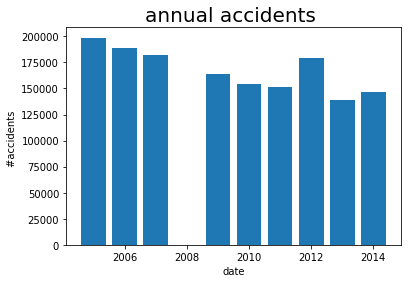

In [3]:
plt.bar(list(naccidents_per_year_out.keys()),
        list(naccidents_per_year_out.values()))
plt.xlabel('date')
plt.ylabel('#accidents ')
plt.title('annual accidents ', fontsize=20)
plt.show()

In [5]:
traffic_vs_year_out = traffic_vs_year()

reading files...


  0%|          | 402/275385 [00:00<01:08, 4018.83it/s]

computing...


100%|██████████| 275385/275385 [01:28<00:00, 3097.23it/s]


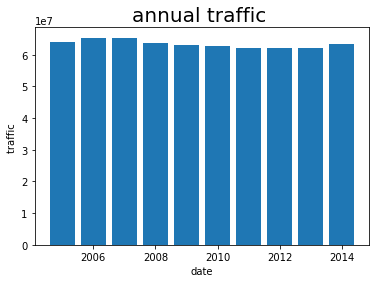

In [6]:
plt.bar(list(traffic_vs_year_out.keys()),
        list(traffic_vs_year_out.values()))
plt.xlabel('date')
plt.ylabel('traffic ')
plt.title('annual traffic ', fontsize=20)
plt.show()

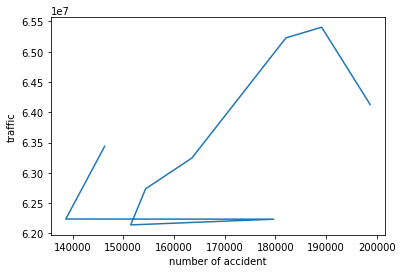

In [12]:
y2008removed = dict(traffic_vs_year_out)
del y2008removed[2008]
plt.plot(list(naccidents_per_year_out.values()),list(y2008removed.values()),label ='traffic and number of accident ')

plt.xlabel('number of accident')
plt.ylabel('traffic')

plt.show()

In [2]:
kind_of_vehicle_out = kind_of_vehicle()

reading files...


  0%|          | 389/275385 [00:00<02:23, 1914.78it/s]

computing...


100%|██████████| 275385/275385 [01:52<00:00, 2457.10it/s]


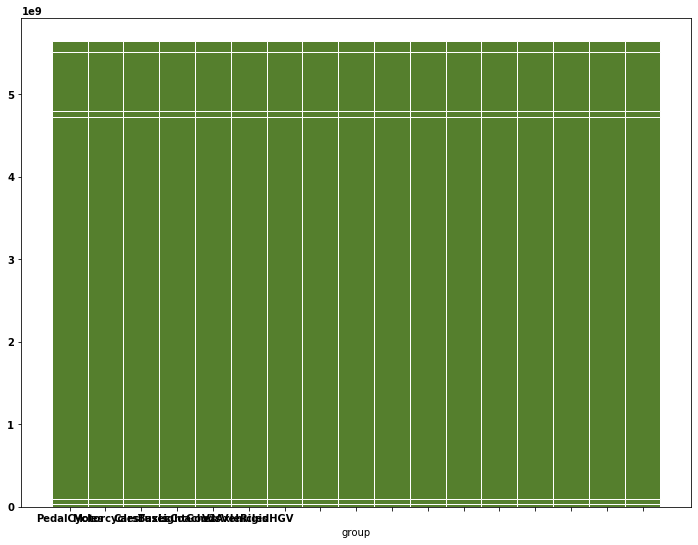

In [44]:
# y-axis in bold
rc('figure',figsize=(12, 9))
bar_width = 5
newdic = {}
# Values of each group
for year in kind_of_vehicle_out:
    for key in kind_of_vehicle_out[year]:
        if (key not in newdic):
            newdic[key] = {}
        newdic[key][year] = kind_of_vehicle_out [year][key]
        
bars = []
for i,item in enumerate(newdic):
    bars.append(list(newdic[item].values()))

padding = [np.zeros(len(bars[0]))]
for i,item in enumerate(bars):
    if i == len(bars):
        continue
    padding.append(np.add(padding[i], bars[i]).tolist())

# The position of the bars on the x-axis
x_position = bar_width*np.arange(17)
 
# Names of group and bar width
names = list(newdic.keys())
 
# Create brown bars
for index, year in enumerate(bars):
    plt.bar(x_position, year, bottom=padding[index],
            color='#557f2d', edgecolor='white', width=bar_width)

# Custom X axis
plt.xticks(x_position, names, fontweight='bold')
plt.xlabel("group")
 
# Show graphic
plt.show()